# Higher order IVP

This section is concerned with the solution of a general class of second order ODE, in which we are given the initial value of the function and its derivative.

\begin{equation*}
y^{\prime\prime}=f(y(x),y^{\prime}(x),x), \qquad y(a)=\alpha, \quad y^{\prime}(b)=\beta.
\end{equation*}

The problem can be solved by stepping forward in time using the solution on the boundary and the first interior point. The solution on the first interior point can be found by using the condition for the derivative.

(cauchy_example)=
## Example

By way of example, we will solve the following second order linear ODE, which has Cauchy-type boundary conditions at $x=0$.

```{math}
:label: 2order_cau
\frac{\mathrm{d}^2 y}{\mathrm{d}x^2} + \frac{\mathrm{d}y}{\mathrm{d}x}-6 y = 0, \qquad y(0)=1, \quad y^{\prime}(0)=0.
```

The problem could be re-written in array form by definining $z=y^{\prime}$ to obtain

\begin{equation}\frac{\mathrm{d}}{\mathrm{d}x}\left[\begin{array}{cc}z\\y\end{array}\right]=\left[\begin{array}{cc}6y-z\\z\end{array}\right]\end{equation}

Therefore it could be solved using any of the methods for first order IVPs previously illustrated (see, e.g {numref}`heun-vector`). You could also solve this problem by hand. However, to demonstrate the techniques we will need for solving partial differential equations, we will instead proceed with use of finite difference formulae in equation {eq}`2order_cau`.

## Forward difference solution

By using the finite difference formulae {eq}`forward2` and {eq}`forwards1`, we obtain

\begin{equation}
y_{k+2}=(2-h)y_{k+1}+(6h^2+h-1)y_k
\end{equation}

Notice that we need two starting points $y_0$ and $y_1$ for this scheme, since the problem is second order. This is equivalent to defining $y(0)$ and $z(0)$ in the array version of the problem. We can obtain the required values from the given initial conditions $y(0)=1$ and $y^{\prime}(0)=0$.

By using the the first order forward finite difference formula we obtain

\begin{equation}\frac{y_1-y_0}{h^2}=y^{\prime}_0 = 0 \quad \Rightarrow \quad y_1 = y_0=1.\end{equation}

An implementation of the forward stepping method is given below. By comparing to the analytic result it is seen that the solution has the correct shape, but relatively poor accuracy, as expected.

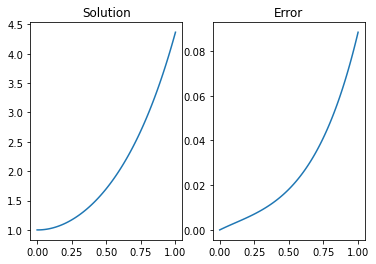

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Define the nodes
n=100                  # solving with 100 nodes
x=np.linspace(0,1,n)   # on the domain [0,1]
h = x[1]-x[0]          # size of each interval

# Implement starting conditions
y=np.zeros(n)
y[0]=1
y[1]=1

# Implement finite difference rule
for k in range(0,n-2):
  y[k+2]=(2-h)*y[k+1]+(6*h**2+h-1)*y[k]

# Compare to analytic solution
fig,ax = plt.subplots(1,2)
ax[0].plot(x,y)
ax[0].set_title('Solution')
ysol = (2*np.exp(-3*x) + 3*np.exp(2*x))/5
ax[1].plot(x,abs((y.T-ysol).T))
ax[1].set_title('Error')
plt.show()

## Central difference solution

We can do better using a quadratic order scheme based on central differences. It is not possible to use a central difference scheme for first order IVPs because the first derivative result requires the use of two starting grid points. We can do it for second order IVPs because two starting conditions are given.

By applying the central formulae for the first and second derivatives {eq}`central2` and {eq}`central1a`, we obtain

```{math}
:label: example_upd
y_{k+1} = \frac{y_k(2+6h^2)-y_{k-1}(1-h/2)}{1+h/2}
```

We could use the forward or backward Euler methods with the first derivative condition to estimate $y_1$. However, these methods are only first order accurate, so this will contaminate our second order accurate algorithm and produce inaccurate results. Instead, we ideally want to use the central difference formula, which gives :

Using a central differences formula for the boundary condition gives:

\begin{equation}\frac{y_1-y_{-1}}{h} = 0 \quad \Rightarrow \quad y_1= y_{-1}.\end{equation}

This relationship involves the solution at the "fictitious" point $y_{-1}$ where $x=-h$. We do not know the result at this fictitious point, but we can proceed by solving the three equations at the left-hand end simultaneously to obtain our starting points. We have

\begin{equation}y_1=-y_{-1}, \quad y_0=1, \quad y_1=\frac{(h-2)y_{-1}+4(3h^2+1)y_0}{h+2}.\end{equation}

Together, these equations give $y_{-1}=1+3h^2$ and so we can start our forward propagation scheme. A visual representation of the forward stepping technique is shown below

<br>

```{image} images/fwd_mch1.png
:alt: secant
:align: center
:scale: 70%
```
<br>

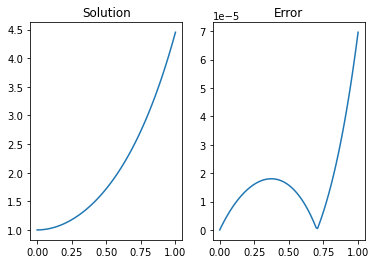

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Define the nodes
n=100                  # solving with 100 nodes
x=np.linspace(0,1,n)   # on the domain [0,1]
h = x[1]-x[0]          # size of each interval

# Implement starting conditions
y=np.zeros(n)
y[0]=1

# Add fictitious point
y=np.insert(y,0,1+3*h**2)

# Implement finite difference rule
for k in range(1,n):
  y[k+1]=((2+6*h**2)*y[k]-(1-h/2)*y[k-1])/(1+h/2)

# remove fictitious point
y=y[1:]

# Compare to analytic solution
fig,ax = plt.subplots(1,2)
ax[0].plot(x,y)
ax[0].set_title('Solution')
ysol = (2*np.exp(-3*x) + 3*np.exp(2*x))/5
ax[1].plot(x,abs((y.T-ysol).T))
ax[1].set_title('Error')
plt.show()

(matrix-cauchy)=
## Matrix approach

As an alternative to solving the left-hand points by hand, we can write the full system of equations for all nodes including the fictitious node as a matrix and solve simultaneously using Gaussian elimination. We have

\begin{equation}\left[\begin{array}{c|ccccc}-1 &0 &1 & 0 & \dots & 0&\\\hline0 &1 &0 & 0 & \ddots &\vdots\\1-h/2 & -(2+6h^2) & 1+h/2 & 0 & \ddots &\vdots\\0 & 1-h/2 & -(2+6h^2) & 1+h/2 & \ddots&\vdots\\\vdots& \vdots & \ddots &\ddots &\ddots & 0\\0 & \dots & 0& 1-h/2 & -(2+6h^2) & 1+h/2\end{array}\right]\left[\begin{array}{cc}y_{-1}&\\\hline y_0\phantom{\vdots}&\\y_1&\phantom{\vdots}\\y_2\phantom{\vdots}&\\ \vdots&\\y_N\end{array}\right]=\left[\begin{array}{cc}0&\\\hline1&\phantom{\vdots}\\0&\phantom{\vdots}\\0&\phantom{\vdots}\\\vdots&\\0\end{array}\right]\end{equation}

<br>

The $(n+1)\times(n+1)$ tri-diagonal matrix has coefficients $\biggr[1+\frac{h}{2},-2-6h^2,1-\frac{h}{2}\biggr]$ on the main diagonal and the first and second subdiagonals, except for the first and second rows which are used to implement the boundary conditions.

```{admonition} Note
:class: theorem
The reason the coefficients are not centred on the main diagonal is because the first two rows are used to implement the boundary conditions.
```

The system is of the form $AX=B$. If you are struggling to understand where the result comes from, write down the some of the simultaneous equations that you get by computing the product $AX$. You should see that each row in the system gives the equation relating a node to its neighbours using the finite difference formula.

You can solve the simultaneous system in Python by using the `lstsq` function from numpy's linear algebra module (`linalg`).

```{exercise}
Set up matrices $A$ and $B$ for the problem in Python for step $h=10^{-3}$ and solve to obtain the solution for $y$.
```

In [3]:
  import numpy as np
  import matplotlib.pyplot as plt

  # Define the nodes
  n=100                  # solving with 100 nodes
  x=np.linspace(0,1,n)   # on the domain [0,1]
  h = x[1]-x[0]          # size of each interval

  #---------------------------------------------------------------
  # Construct tridiagonal matrix A and vector b
  # Initially we do not worry about implementation of the BCs

  coeff1 = 1-h/2
  coeff2 = -2-6*h**2
  coeff3 = 1+h/2

  A = np.diag(coeff1*np.ones(n-1),k=-2) + \
      np.diag(coeff2*np.ones(n),  k=-1) + \
      np.diag(coeff3*np.ones(n+1),k=0)

  b = np.zeros((n+1,1))   # the problem was homogeneous

  #---------------------------------------------------------------
  # Enforce the boundary conditions

  #y_{-1}-y_1=0:
  A[0,[0,1,2]] = [-1,0,1]
  b[0]=0

  #y_0=1:
  A[1, [0,1,2]] = [0,1,0]
  b[1] = 1

  #---------------------------------------------------------------
  # Solve the matrix system numerically

  y,_,_,_= np.linalg.lstsq(A,b,rcond = None)
  y = y[1:]                                     #remove fictitious end point